## Sentence Embeddings

In this task, I will measure **sentence similarity** using the Sentence Transformers library. 

**Sentence similarity** measures how close two pieces of text are.

For instance, the phrase I like kittens and we love cats have similar meaning. 

The sentence similarity is particularly useful for information retrieval and clustering or grouping. 

In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
model = SentenceTransformer("all-MiniLM-L6-v2")

Sentence similarity models convert input text into vectors or so-called embeddings. These embeddings capture semantic information. Let's encode the following sentences.

In [3]:
sentences1 = [
    'The cat sites outside',
    'A man is playing guiter',
    'The movies are awesome'
]

In [5]:
embeddings1 = model.encode(sentences1, 
                         convert_to_tensor = True) # 转换成 PyTorch 的 tensor（张量）格式

In [6]:
embeddings1

tensor([[ 0.1038, -0.0103,  0.0326,  ...,  0.0239, -0.0283,  0.0501],
        [ 0.0329, -0.0193, -0.0781,  ..., -0.0264,  0.0059,  0.0584],
        [-0.1043, -0.0628,  0.0093,  ...,  0.0020,  0.0653, -0.0150]],
       device='mps:0')

In [7]:
sentences2 = [
    'The dog plays in the garden',
    'A woman watches TV',
    'The new movie is so great'
]

In [8]:
embeddings2 = model.encode(sentences2,
                          convert_to_tensor= True)

In [9]:
embeddings2

tensor([[ 0.0163, -0.0700,  0.0384,  ...,  0.0447,  0.0254, -0.0023],
        [ 0.0054, -0.0920,  0.0140,  ...,  0.0167, -0.0086, -0.0424],
        [-0.0842, -0.0592, -0.0010,  ..., -0.0157,  0.0764,  0.0389]],
       device='mps:0')

We can calculate how close these sentences are between them. To do that, we will use the cosine distance, which is measure to calculate how close and how far two vectors are. 

In [10]:
from sentence_transformers import util

In [11]:
cosine_scores = util.cos_sim(embeddings1, embeddings2)

In [12]:
cosine_scores

tensor([[ 0.1943,  0.0136,  0.0320],
        [ 0.2211,  0.0165,  0.0141],
        [-0.0124, -0.0465,  0.6571]], device='mps:0')

Notice that these are pairwise similarity for every sentence in the first list, to every sentence in the second list. 

If you look at the diagonal of martix, you will get the similarities between the first sentences of both list. 
The second element of the diagonal will be the sencond sentences of both lists. 
And the third element of the diagonal will be the similarities between the third sentences of both lists.

Now let's output the score of each pair in both lists.

In [14]:
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i],
                                                sentences2[i],
                                                cosine_scores[i][i]))

The cat sites outside 		 The dog plays in the garden 		 Score: 0.1943
A man is playing guiter 		 A woman watches TV 		 Score: 0.0165
The movies are awesome 		 The new movie is so great 		 Score: 0.6571


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
type(cosine_scores)

torch.Tensor

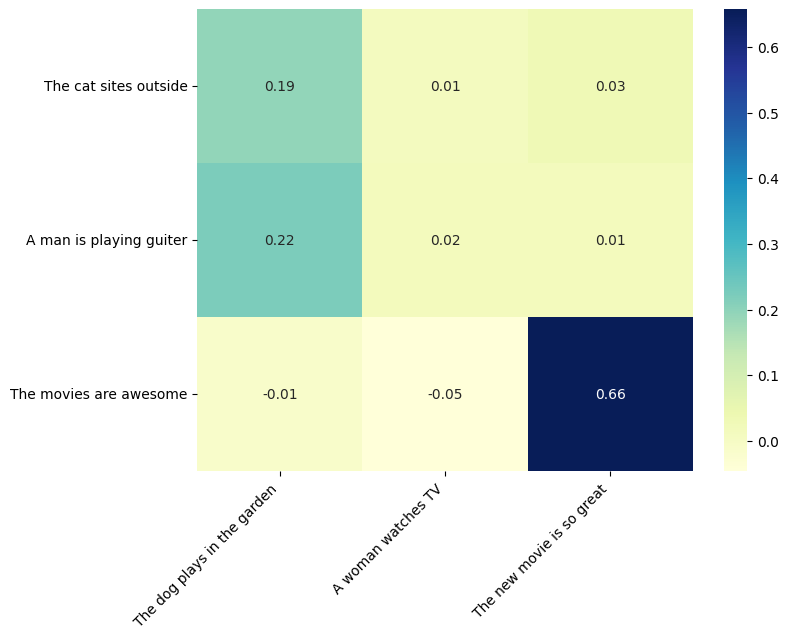

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_scores.cpu().detach().numpy(), 
            annot=True, 
            fmt=".2f", 
            xticklabels=sentences2, yticklabels=sentences1, 
            cmap="YlGnBu")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()

In [20]:
import gc

In [21]:
del model